第 1 次 : theta0 = 1.193, theta1 = 1.057, 差值 = 374.2698
第 2 次 : theta0 = 1.644, theta1 = 1.400, 差值 = 305.1830
第 3 次 : theta0 = 2.051, theta1 = 1.710, 差值 = 248.8489
第 4 次 : theta0 = 2.418, theta1 = 1.990, 差值 = 202.9137
第 5 次 : theta0 = 2.750, theta1 = 2.242, 差值 = 165.4576
第 6 次 : theta0 = 3.050, theta1 = 2.470, 差值 = 134.9156
第 7 次 : theta0 = 3.320, theta1 = 2.676, 差值 = 110.0114
第 8 次 : theta0 = 3.565, theta1 = 2.862, 差值 = 89.7043
第 9 次 : theta0 = 3.785, theta1 = 3.030, 差值 = 73.1457
第 10 次 : theta0 = 3.984, theta1 = 3.182, 差值 = 59.6437
第 11 次 : theta0 = 4.164, theta1 = 3.318, 差值 = 48.6340
第 12 次 : theta0 = 4.327, theta1 = 3.442, 差值 = 39.6566
第 13 次 : theta0 = 4.473, theta1 = 3.554, 差值 = 32.3363
第 14 次 : theta0 = 4.606, theta1 = 3.655, 差值 = 26.3673
第 15 次 : theta0 = 4.726, theta1 = 3.746, 差值 = 21.5002
第 16 次 : theta0 = 4.834, theta1 = 3.828, 差值 = 17.5314
第 17 次 : theta0 = 4.931, theta1 = 3.902, 差值 = 14.2953
第 18 次 : theta0 = 5.019, theta1 = 3.969, 差值 = 11.6565
第 19 次 : theta0 = 5.099, theta

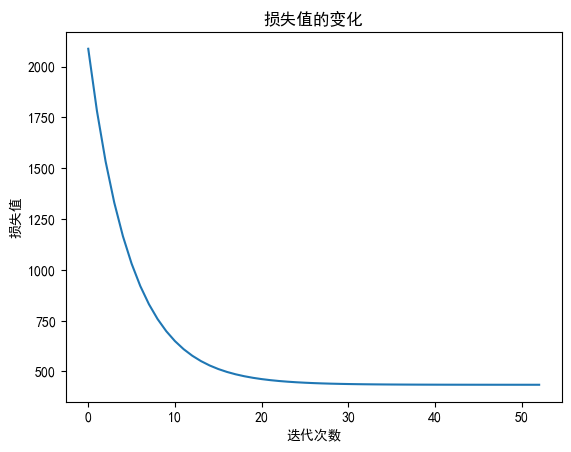

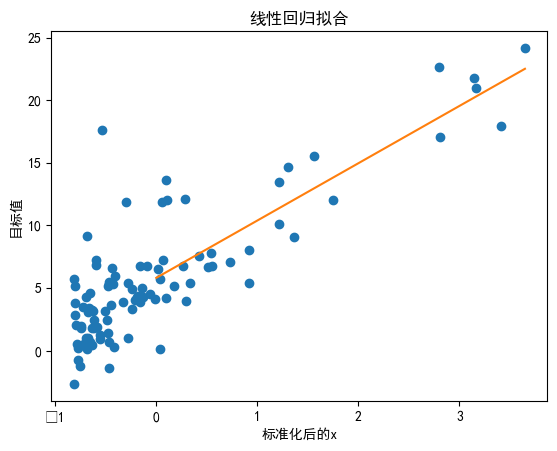

预测值为: 2.654968129249718


In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["SimHei"]
# 读入训练数据
data = np.loadtxt('data1.txt', delimiter=',')
train_x = data[:, 0]
train_y = data[:, 1]

# 标准化
mu = train_x.mean()
sigma = train_x.std()

def hypothesis(theta0, theta1, x):
    x=standardize(x)
    return theta0 + theta1 * x
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 预测函数
def f(x):
    return theta0 + theta1 * x

# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 学习率
ETA = 0.001

# 误差的差值
diff = 1

# 更新次数
count = 0

# 记录损失值的列表
loss_history = []

# 直到误差的差值小于 0.01 为止，重复参数更新
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新结果保存到临时变量
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # 更新参数
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 计算与上一次误差的差值
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # 记录损失值
    loss_history.append(error)

    # 输出日志
    count += 1
    log = '第 {} 次 : theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

# 绘制损失变化图
plt.figure()
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('迭代次数')
plt.ylabel('损失值')
plt.title('损失值的变化')
plt.show()

# 绘图确认
x = np.linspace(0, train_z.max(), 100)
plt.figure()
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.xlabel('标准化后的x')
plt.ylabel('目标值')
plt.title('线性回归拟合')
plt.show()
new_sample_x = 5.5  
predicted_y = hypothesis(theta0, theta1, new_sample_x)
print(f'预测值为: {predicted_y}')

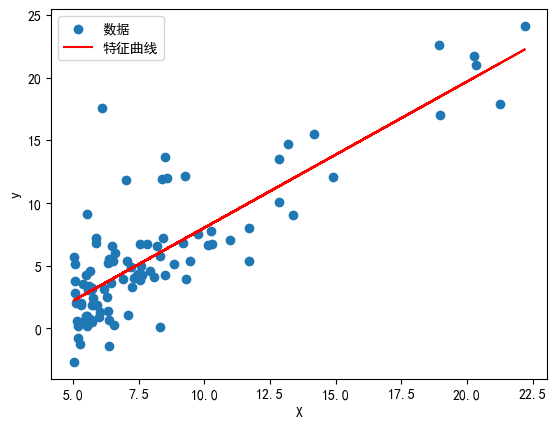

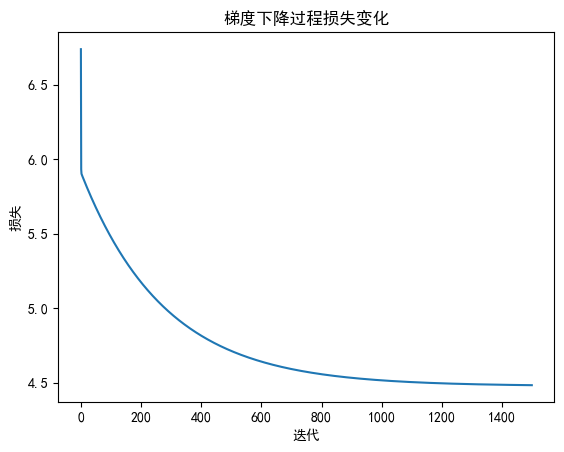

预测值为: 2.7847014874413416


In [94]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

def compute_cost(theta0, theta1, X, y):
    m = len(X)
    predictions = hypothesis(theta0, theta1, X)
    squared_error = (predictions - y) ** 2
    cost = (1 / (2 * m)) * np.sum(squared_error)
    return cost
def gradient_descent(X, y, theta0, theta1, alpha, num_iterations):
    m = len(X)
    cost_history = []

    for i in range(num_iterations):
        predictions = hypothesis(theta0, theta1, X)
        error = predictions - y
        theta0 -= alpha * (1 / m) * np.sum(error)
        theta1 -= alpha * (1 / m) * np.sum(error * X)
        cost = compute_cost(theta0, theta1, X, y)
        cost_history.append(cost)

    return theta0, theta1, cost_history
theta0 = 0
theta1 = 0
alpha = 0.01
num_iterations = 1500

theta0, theta1, cost_history = gradient_descent(X, y, theta0, theta1, alpha, num_iterations)
plt.scatter(X, y, label="数据")
plt.plot(X, hypothesis(theta0, theta1, X), color='red', label='特征曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
plt.plot(range(num_iterations), cost_history)
plt.xlabel('迭代')
plt.ylabel('损失')
plt.title('梯度下降过程损失变化')
plt.show()
new_sample_x = 5.5  # 替换为您要预测的新样本特征值
predicted_y = hypothesis(theta0, theta1, new_sample_x)
print(f'预测值为: {predicted_y}')
